# Black-Scholes Model

This notebook demonstrates pricing European call and put options using the Black-Scholes formula.

We assume:
- Constant volatility
- Lognormal asset returns
- No dividends
- Risk-free rate is constant and known


In [ ]:
import sys
sys.path.append("../models")
from black_scholes import black_scholes_price

S = 100     # Spot price
K = 100     # Strike price
T = 1       # Time to maturity (1 year)
r = 0.05    # Risk-free rate (5%)
sigma = 0.2 # Volatility

call_price = black_scholes_price(S, K, T, r, sigma, "call")
put_price = black_scholes_price(S, K, T, r, sigma, "put")

print(f"Call Price: {call_price:.2f}")
print(f"Put Price: {put_price:.2f}")

Call Price: 10.45
Put Price: 5.57


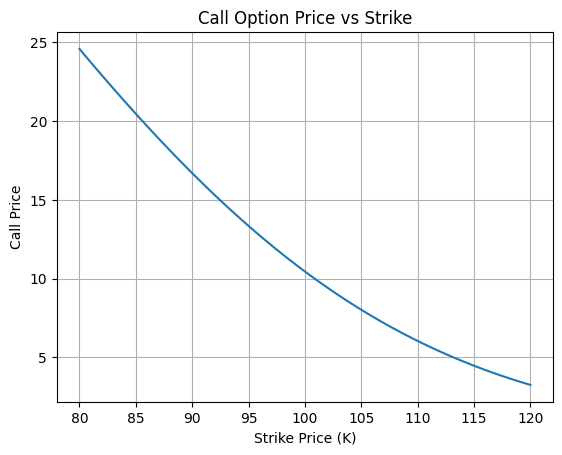

In [6]:
import numpy as np
import matplotlib.pyplot as plt

strikes = np.linspace(80, 120, 40)
prices = [black_scholes_price(S, K, T, r, sigma, "call") for K in strikes]

# Plot call option price vs Strike
plt.plot(strikes, prices)
plt.title("Call Option Price vs Strike")
plt.xlabel("Strike Price (K)")
plt.ylabel("Call Price")
plt.grid(True)
plt.show()

## Option Greeks: Sensitivity Measures

Greeks measure how the value of an option changes with respect to different factors.

| Greek | Sensitivity To | Interpretation |
|-------|----------------|----------------|
| Delta | Underlying Price (S) | Measures how much the option price changes for a small change in the underlying asset's price. For calls, Δ ∈ [0, 1]; for puts, Δ ∈ [−1, 0]. |
| Gamma | Delta           | Measures how much Delta changes as the underlying price changes. Highest for at-the-money options. |
| Vega  | Volatility (σ)  | Measures sensitivity of option price to changes in implied volatility. |
| Theta | Time (T)        | Measures the rate of time decay in the option's value — how much value is lost each day. |
| Rho   | Interest Rate (r) | Measures sensitivity to changes in the risk-free interest rate. |

We plot these Greeks against the underlying price (S) to visualize how risk sensitivities change across moneyness.
